# DataAugmentation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import sys
import random
from PIL import Image
import numpy as np
import tqdm as tqdm

from torchvision import transforms

sys.path.insert(0, "..\\Scripts")

from DataAugmentation import DataAugmentation

## Prove

In [2]:
im_path = os.path.join("..\\Dataset\\train_set", "train_043794.jpg")
img = cv2.imread(im_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = Image.fromarray(img)

aug = DataAugmentation()
im_hole = aug.random_cutout(img)
im_sat = aug.random_saturation(img)
im_rot = aug.random_rotation(img)
im_blur = aug.random_gaussian_blur(img)
im_crop = aug.random_resized_crop(img)
im_brightness = aug.random_brightness(img)
im_tot = aug.apply_transformations(img)

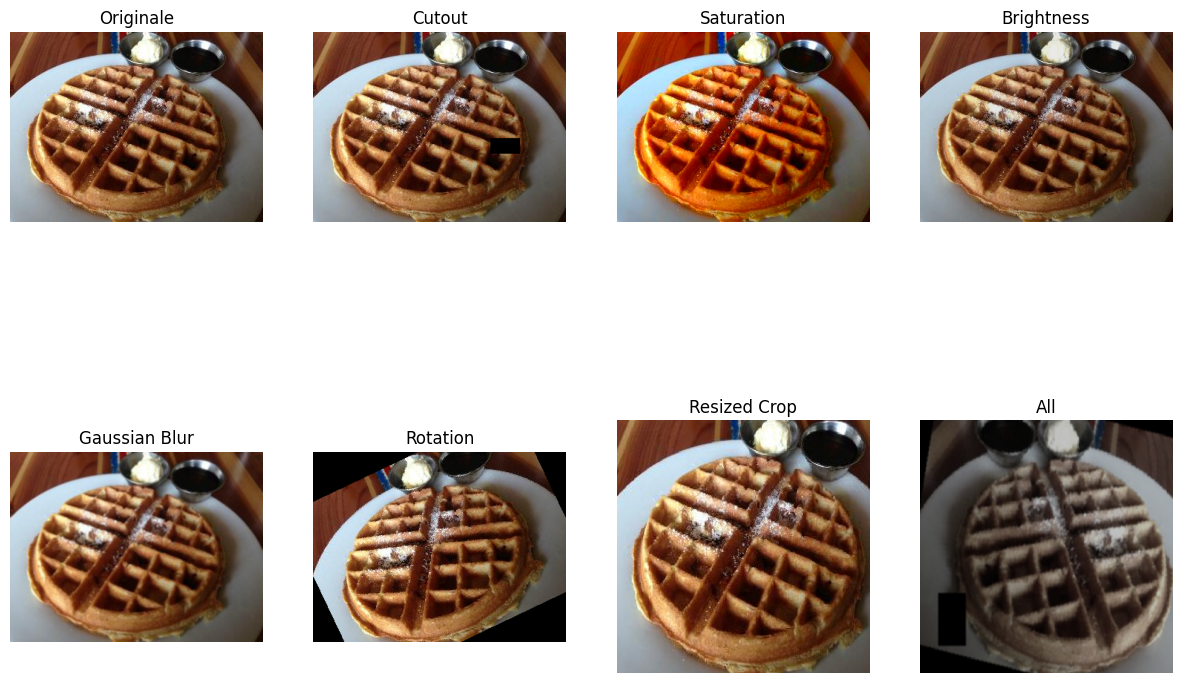

In [3]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0][0].imshow(img)
ax[0][0].set_title("Originale")
ax[0][0].axis("off")

ax[0][1].imshow(im_hole)
ax[0][1].set_title("Cutout")
ax[0][1].axis("off")

ax[0][2].imshow(im_sat)
ax[0][2].set_title("Saturation")
ax[0][2].axis("off")

ax[0][3].imshow(im_brightness)
ax[0][3].set_title("Brightness")
ax[0][3].axis("off")

ax[1][0].imshow(im_blur)
ax[1][0].set_title("Gaussian Blur")
ax[1][0].axis("off")

ax[1][1].imshow(im_rot)
ax[1][1].set_title("Rotation")
ax[1][1].axis("off")

ax[1][2].imshow(im_crop)
ax[1][2].set_title("Resized Crop")
ax[1][2].axis("off")

ax[1][3].imshow(im_tot)
ax[1][3].set_title("All")
ax[1][3].axis("off")

plt.show()

## Create new dataset - Data Augmentation 1

In [10]:
df_small = pd.read_csv('../Dataset/labels_experiment/train_retrieval_k25_centroid.csv')
df_small.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


In [6]:
path_augmented_data = os.path.join("..", "Dataset", "train_augmented")

if not os.path.exists(path_augmented_data):
    os.makedirs(path_augmented_data)

In [7]:
path_train = os.path.join("..", "Dataset", "train_set")

In [11]:
for i, row in df_small.iterrows():
    img_file = row["Image"]
    img_name = img_file.split(".")[0]
    img = cv2.imread(os.path.join(path_train, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)

    for j in range(5):
        im_tot = aug.apply_transformations(img)
        im_tot.save(os.path.join(path_augmented_data, f"{img_name}_{j}.jpg"))

In [12]:
df_augmented = pd.DataFrame(columns=["Image", "Label"])
rows = []

for i, row in df_small.iterrows():
    img_file = row["Image"]
    img_name = img_file.split(".")[0]
    for j in range(5):
        rows.append({"Image": f"{img_name}_{j}.jpg", "Label": row["Label"]})

df_augmented = pd.DataFrame(rows)


In [13]:
df_augmented.to_csv(os.path.join("..", "Dataset", "train_augmented.csv"), index=False)